# **Image Classification using Deep AutoViML**

I used a [fruit dataset](https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection) from Kaggle which contains 240 and 60 images of apples, banana, oranges and mixed fruit in train and validation respectively. To test the model, I used random fruit images


Reference - https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Image_Classification_Demo.ipynb

In [ ]:
pip install deep_autoviml

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [ ]:
from google.colab import files

files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

 60% 17.0M/28.4M [00:00<00:00, 56.1MB/s]
100% 28.4M/28.4M [00:00<00:00, 81.5MB/s]


In [ ]:
!unzip fruit-images-for-object-detection.zip -d fruit-images

### Defining paramters and data path

In [ ]:
!cd /content/fruit-images/train/

/content/fruit-images/train


In [ ]:
!mkdir {apple banana mixed orange}

In [ ]:
!mv apple* apple/
!mv banana* banana/
!mv mixed* mixed/
!mv orange* orange/

In [ ]:
!cd /content/fruit-images/

In [ ]:
!mv /content/fruit-images/validation/apple* /content/fruit-images/validation/apple/
!mv /content/fruit-images/validation/banana* /content/fruit-images/validation/banana/
!mv /content/fruit-images/validation/mixed* /content/fruit-images/validation/mixed/
!mv /content/fruit-images/validation/orange* /content/fruit-images/validation/orange/

In [ ]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [ ]:
target = 'image' ### It doesn't matter what name you give for image target
datapath = '/content/fruit-images'

In [ ]:
image_dir = datapath
img_height = 224
img_width = 224
img_channels = 3

## Training the automl model

In [ ]:

keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }

    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as /content/fruit-images
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
Found 240 files belonging to 5 classes.
Found 60 files belonging to 5 classes.
Number of image classes = 5 and they are: ['.ipynb_checkpoints', 'apple', 'banana', 'mixed', 'orange']
Training image model. This will take time...
Epoch 1/3
4/4 [==============================] - 17s 3s/step - loss: 1.3776 - accuracy: 0.4083 - val_loss: 0.9734 - val_accuracy: 0.6833
Epoch 2/3
4/4 [==============================] - 9s 2s/step - loss: 0.8769 - accuracy: 0.7083 - val_loss: 0.6904 - val_accuracy: 0.8667
Epoch 3/3
1/1 [==============================] - 2s 2s/step - loss: 0.5195 - accuracy: 0.8667
    Model accuracy in Image validation data: 0.8666666746139526

Model not being saved since save_model_flag set to False...
Model: "sequential_6"
____________________________

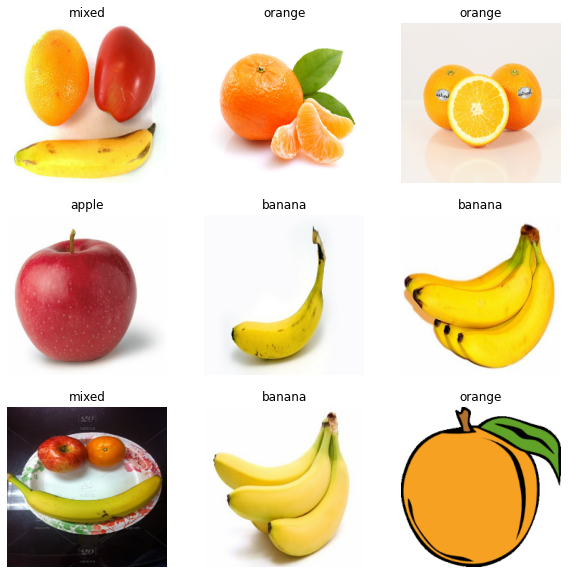

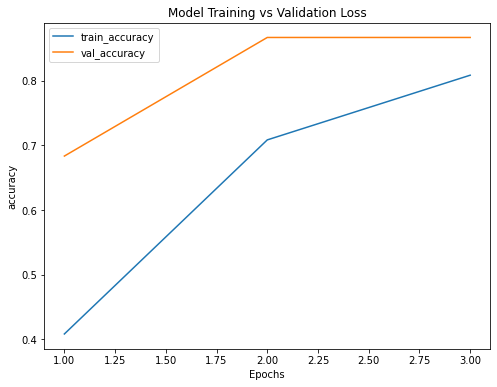

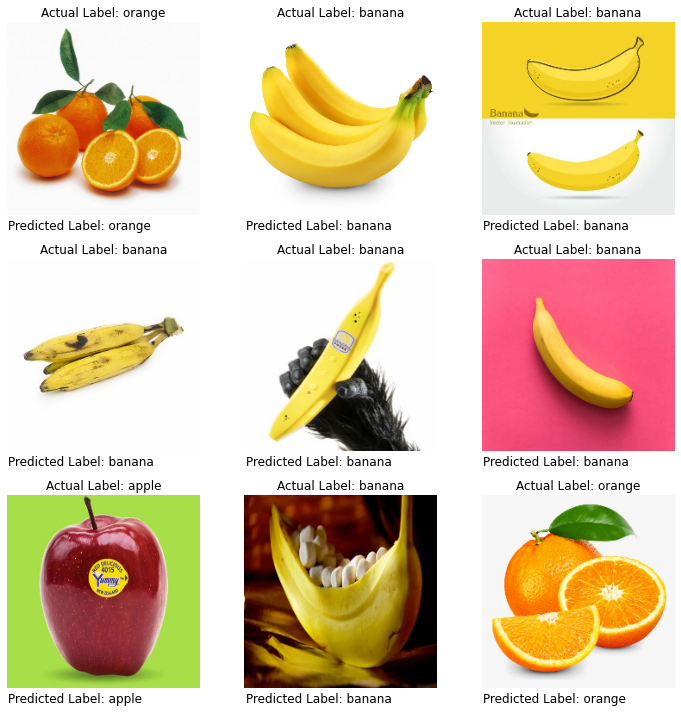

In [ ]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name='fruit-detection',
                 save_model_flag=False, model_options=model_options,model_use_case='',
                            keras_options=keras_options, use_my_model='', verbose=0)

## Runnning the model on test set with random images

In [ ]:
test_image_dir = "/content/fruit-images/test/"

In [ ]:
predictions = deepauto.predict_images(test_image_dir, model, dicti, "image")


Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7f33d0039710> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7f33d0039710> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/fruit-images/test/
Found 5 files belonging to 5 classes.
    Sample predictions before inverse_transform: [4 2 4 1 4]
    Sample predictions after inverse_transform: ['orange' 'banana' 'orange' 'apple' 'orange']


I have added the images used for test in a directory called "test_images" in the github repo